In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist # Using MNIST for demonstration

In [10]:
!pip install opencv-python


In [11]:
import cv2


In [3]:
# Load EMNIST dataset (for real character recognition, download EMNIST)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values (0-255 to 0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape images for MLP input
x_train = x_train.reshape(-1, 28*28) # Flatten (28x28) images to 1D array
x_test = x_test.reshape(-1, 28*28)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print("Dataset Loaded: ", x_train.shape, y_train.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Dataset Loaded:  (60000, 784) (60000, 10)


In [4]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(28*28,)), # Input layer
    Dense(128, activation='relu'), # Hidden layer 1
    Dense(64, activation='relu'), # Hidden layer 2
    Dense(10, activation='softmax') # Output layer (10 classes for digits)
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.8939 - loss: 0.3652 - val_accuracy: 0.9516 - val_loss: 0.1480
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9715 - loss: 0.0906 - val_accuracy: 0.9736 - val_loss: 0.0950
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9808 - loss: 0.0607 - val_accuracy: 0.9766 - val_loss: 0.0835
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9846 - loss: 0.0499 - val_accuracy: 0.9755 - val_loss: 0.0802
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9891 - loss: 0.0344 - val_accuracy: 0.9733 - val_loss: 0.0929
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9911 - loss: 0.0270 - val_accuracy: 0.9773 - val_loss: 0.0876
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9914 - loss: 0.0249 - val_accuracy: 0.9765 - val_loss: 0.0911
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9925 - loss: 0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


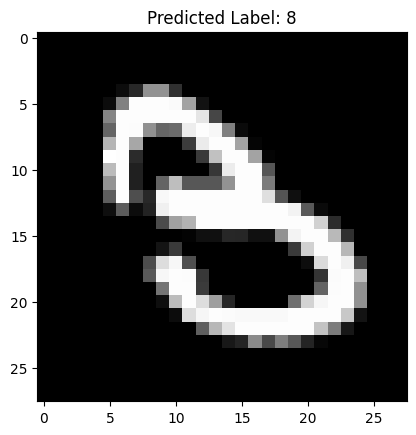

In [53]:
def recognize_character(img):
    img = cv2.resize(img, (28, 28)) # Resize to 28x28
    img = img / 255.0 # Normalize
    img = img.reshape(1, 28*28) # Flatten
    prediction = model.predict(img)
    predicted_label = np.argmax(prediction)
    return predicted_label

# Load a test image
sample_img = x_test[18].reshape(28, 28) # Take first image from test set
plt.imshow(sample_img, cmap='gray')
plt.title(f"Predicted Label: {recognize_character(sample_img)}")
plt.show()

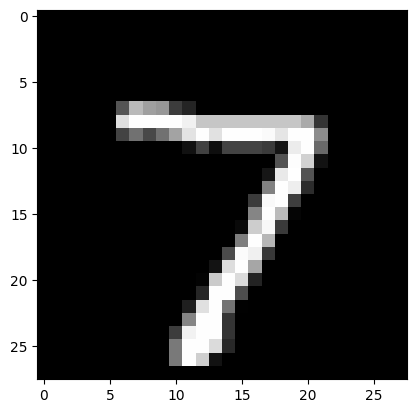

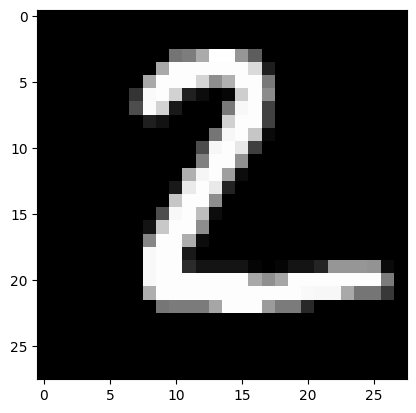

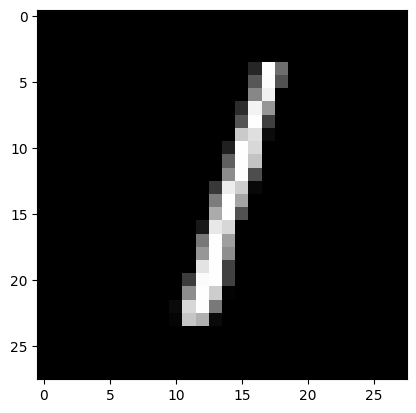

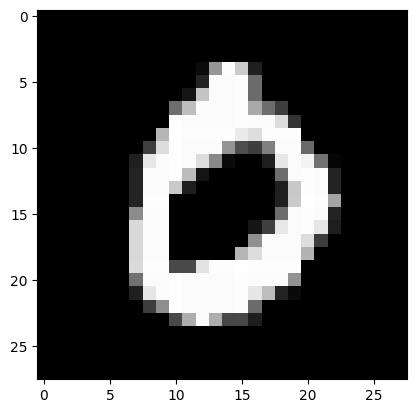

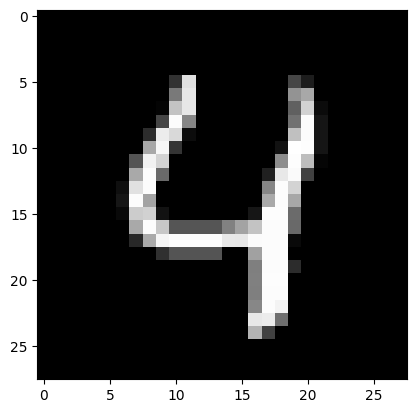

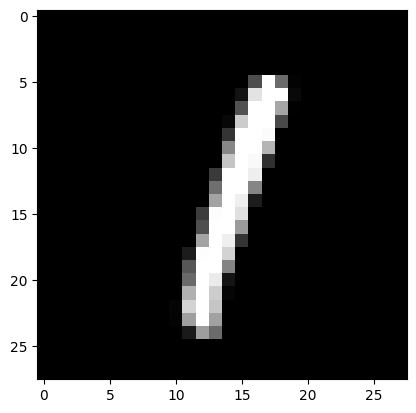

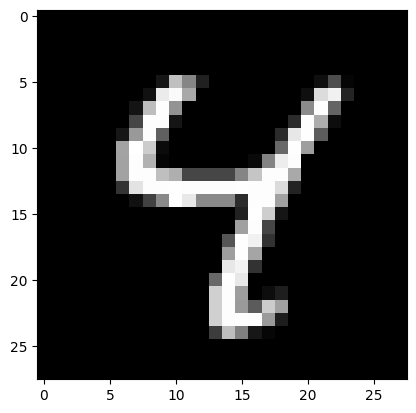

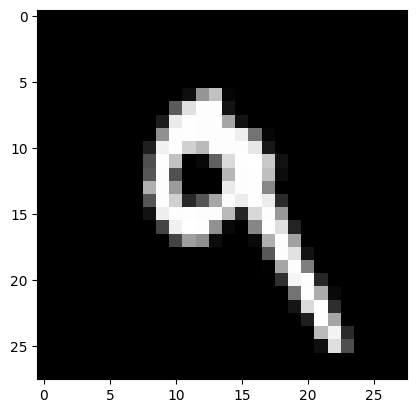

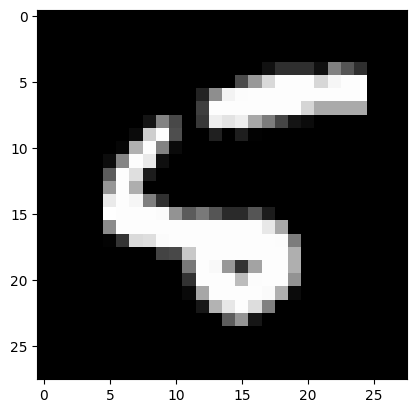

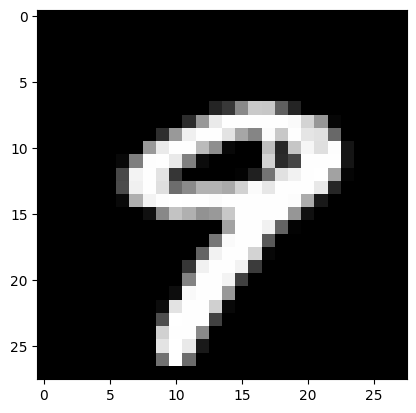

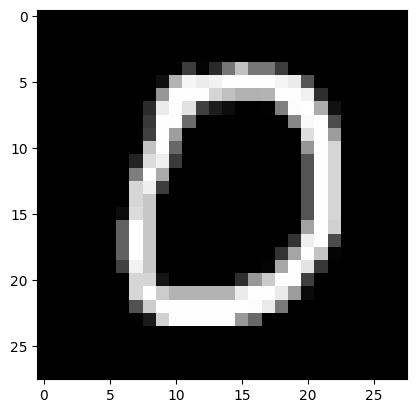

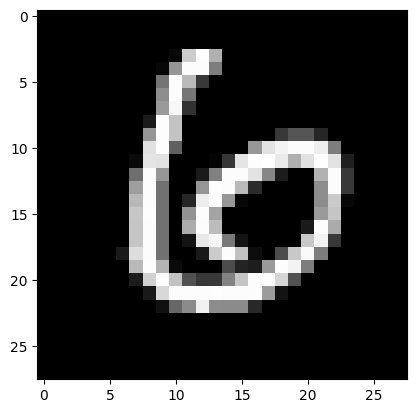

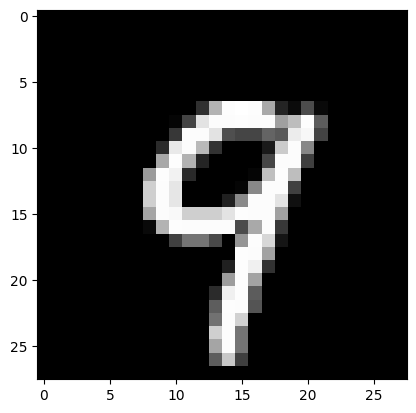

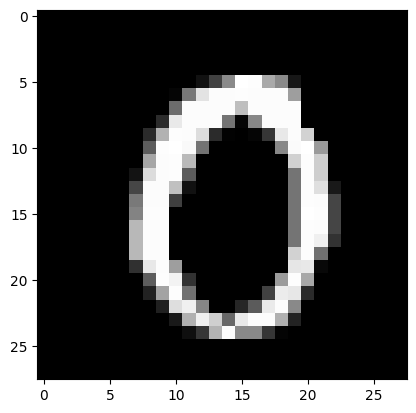

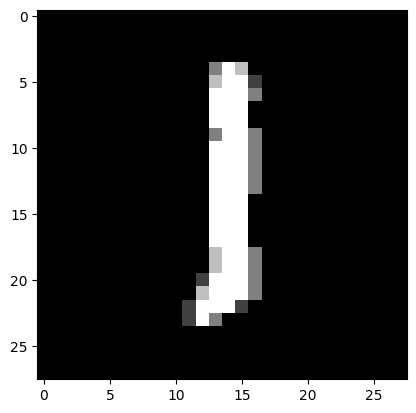

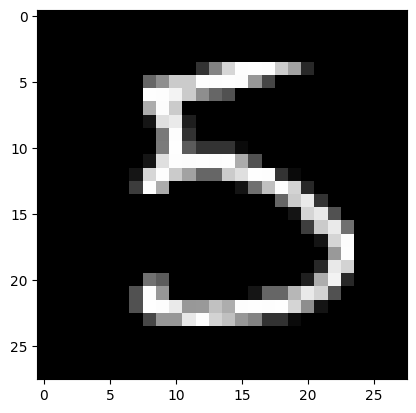

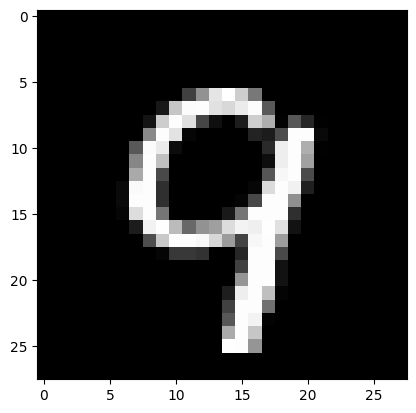

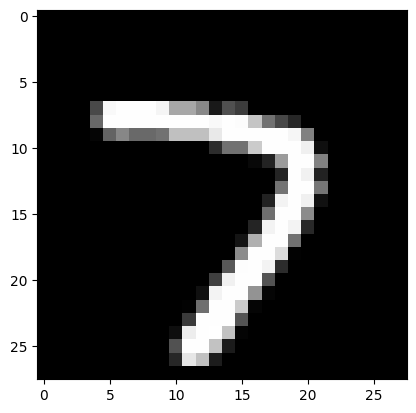

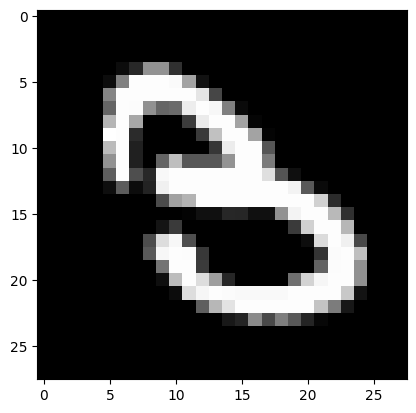

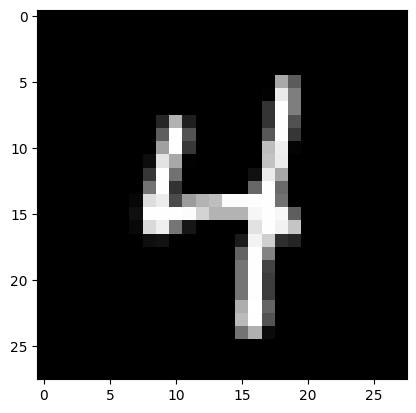

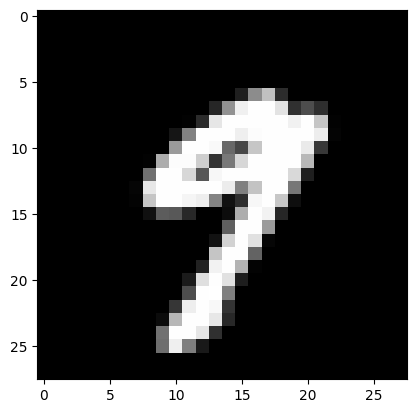

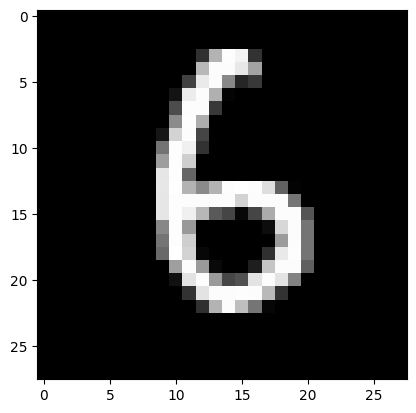

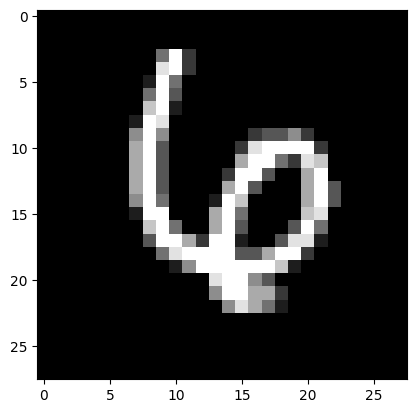

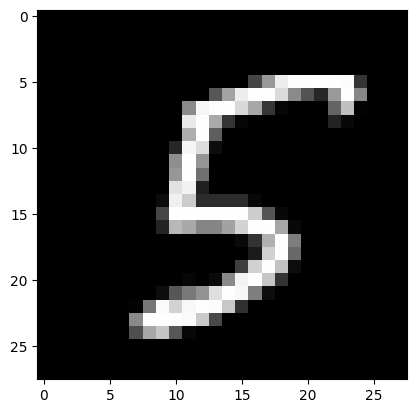

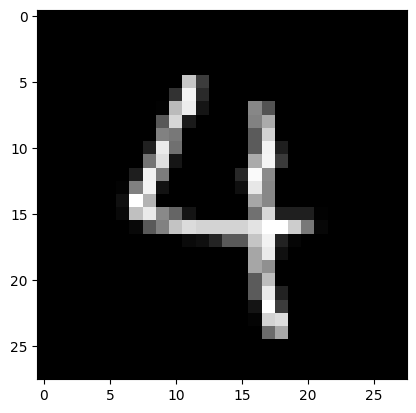

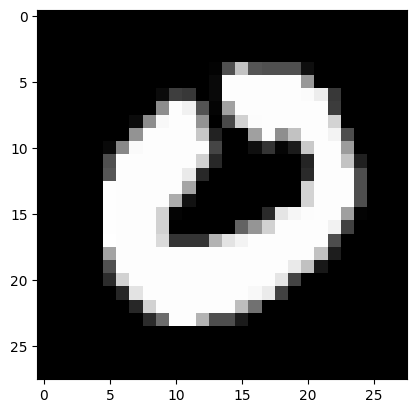

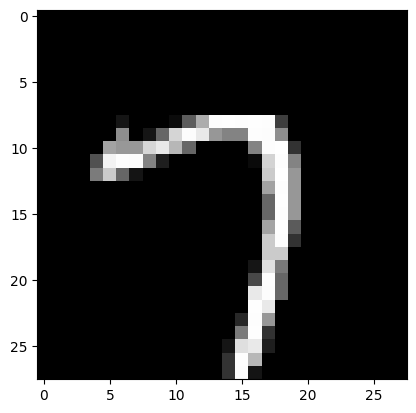

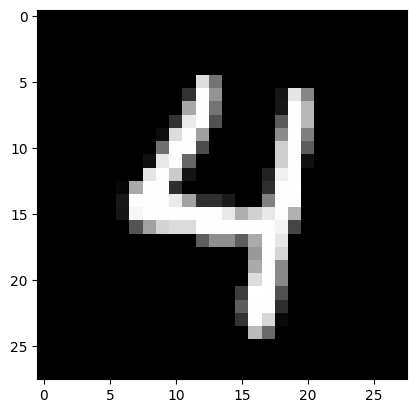

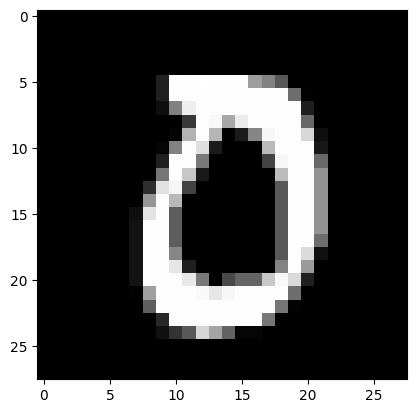

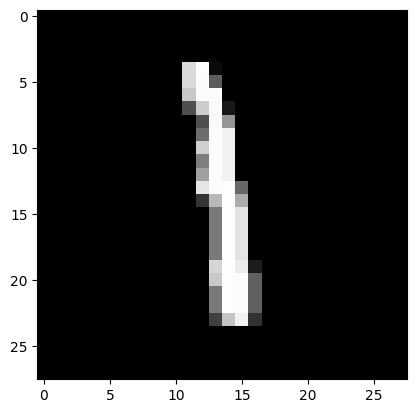

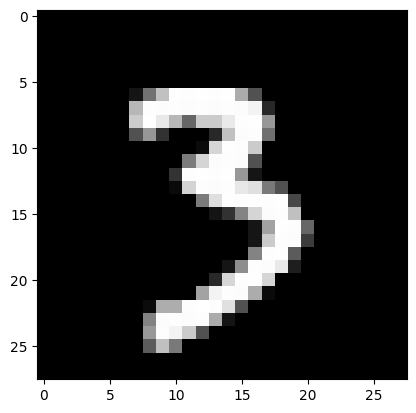

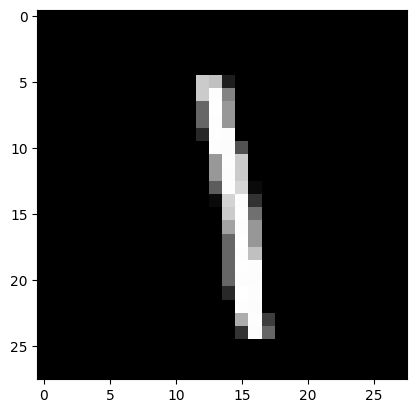

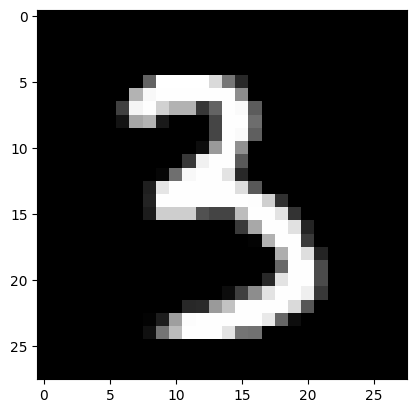

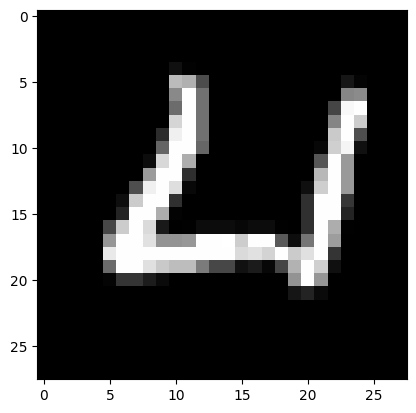

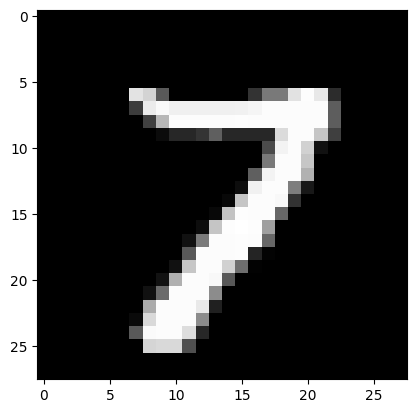

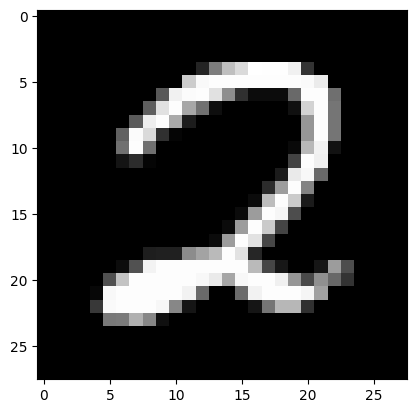

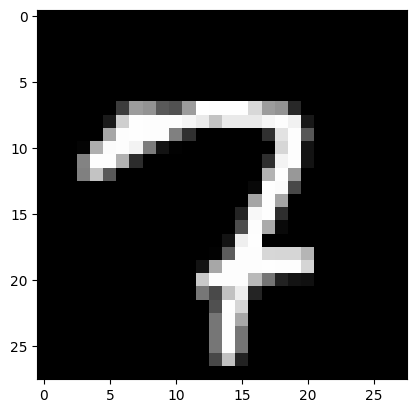

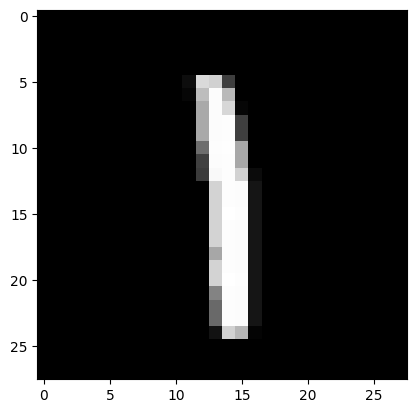

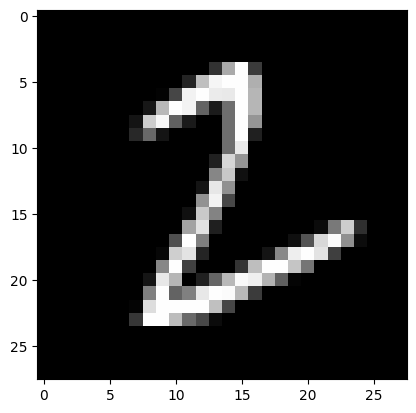

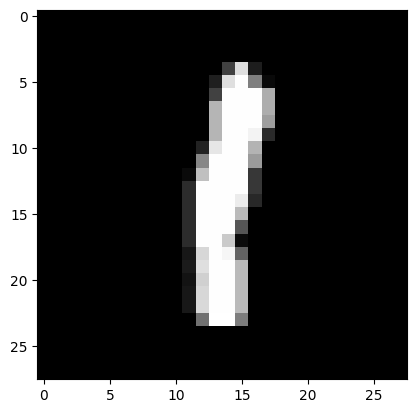

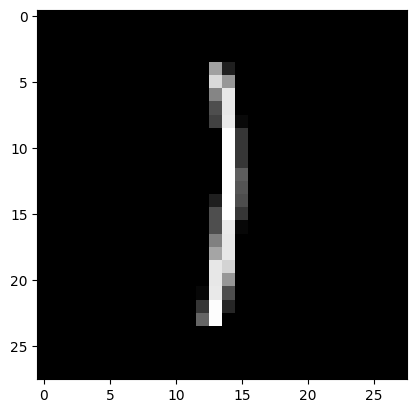

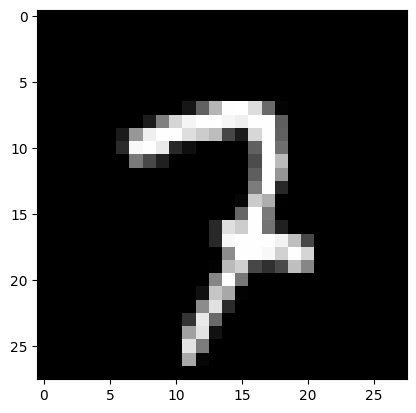

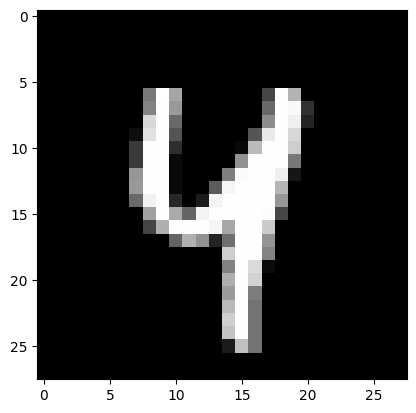

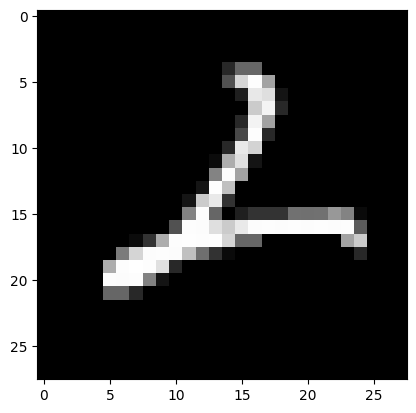

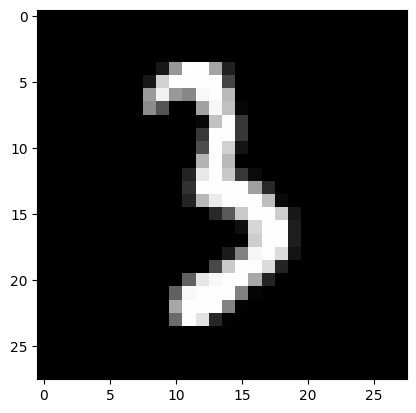

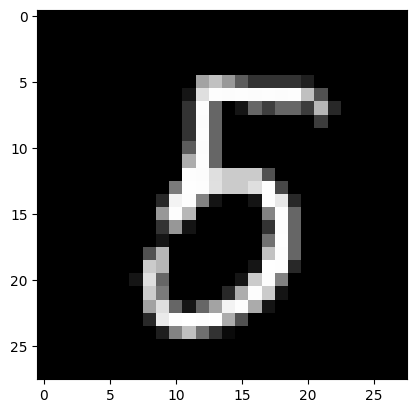

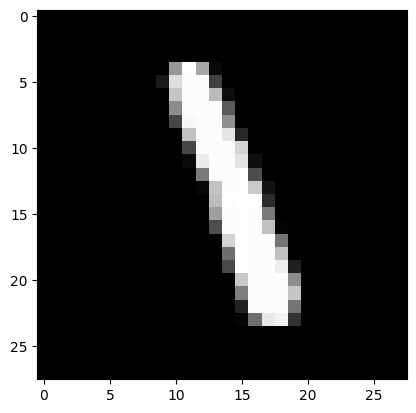

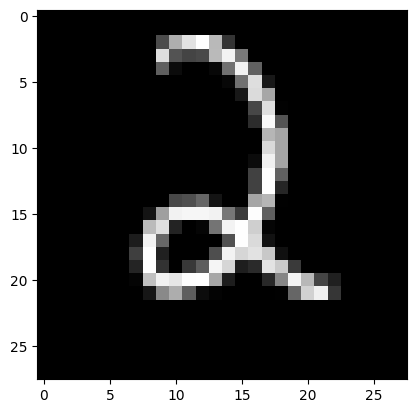

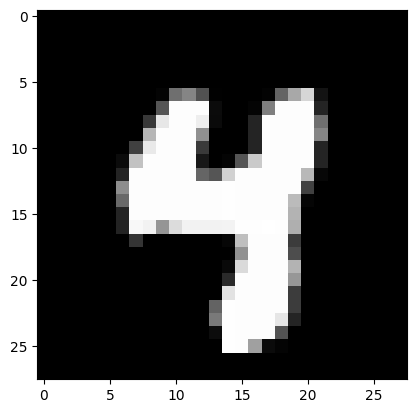

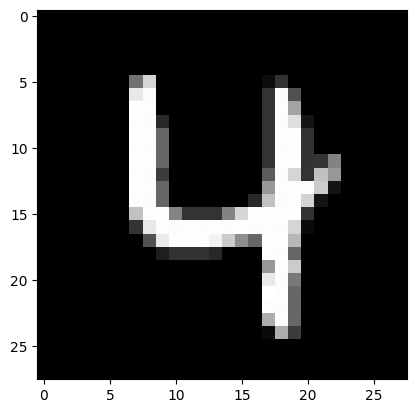

In [52]:
mport matplotlib.pyplot as plt

# Assuming x_test is your test dataset (e.g., 30x28x28 images)
sample_img = []  # Initialize an empty list to store images

for i in range(50):
    sample_img.append(x_test[i].reshape(28, 28))  # Reshape each image
    plt.imshow(sample_img[i], cmap='gray')  # Display the image
    plt.show()  # Show the image one by one
